# Frequency Distributions
---
1. Frequency Distributions of all Continuous Variables (Histogram)
2. Most Common for all Categorical Variables  (Bar Chart - Count)


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

alpha = 0.05

from scipy.stats import ttest_ind, ttest_1samp, ttest_rel

pd.set_option('display.max_columns', 100)

In [30]:
sns.set(font_scale=1.4)

In [3]:
df = pd.read_csv('./data/qwantify.csv')

In [88]:
df.head()

,startTime_ISO8601,startTime_secondsSinceMidnight1Jan1970UTC,estimatedSecondsSinceAlert,wantingAnything,whatWanting,wantingIntensity,wantedToFeel_control,wantedToFeel_lessStress,wantedToFeel_goodAboutMe,wantedToFeel_connected,wantedToFeel_comfort,wantedToFeel_novelty,wantedToFeel_calm,wantedToFeel_health,wantedToFeel_energy,wantedToFeel_goodPerson,wantedToFeel_competent,wantedToFeel_acknowledged,wantedToFeel_helpful,wantedToFeel_other,wantedToFeel_specifiedOther,wantedToFeel_nothingInParticular,doing,doing_specifiedOther,withOthers,feelingBadToGood,energy,physically_good,physically_energized,physically_hungry,physically_tired,physically_uncomfortable,physically_other,physically_specifiedOther,physically_noFeeling,feeling_angry,feelingIntensity_angry,feeling_anxious,feelingIntensity_anxious,feeling_awe,feelingIntensity_awe,feeling_content,feelingIntensity_content,feeling_frustrated,feelingIntensity_frustrated,feeling_grateful,feelingIntensity_grateful,feeling_happy,feelingIntensity_happy,feeling_jealous,feelingIntensity_jealous,feeling_loving,feelingIntensity_loving,feeling_proud,feelingIntensity_proud,feeling_restless,feelingIntensity_restless,feeling_sad,feelingIntensity_sad,feeling_other,feeling_specifiedOther,feeling_noEmotion,thinkingOverAndOver,comparingToOthers,lonely,selfWorth,appreciating,stressed
0,2017-05-02T20:11:01-07:00,1493781061,2351.0,2,Work on data project,0.494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,talk,NaN,2,0.633,0.771,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.629,0.000,0.000
1,2017-05-02T12:41:30-07:00,1493754090,2354.0,2,Apply to jobs,0.281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,chores,NaN,0,0.506,0.629,0,0,0,0,0,0,NaN,1,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,0.426,NaN,0.0,0.500,0.000,0.104
2,2017-05-02T08:34:34-07:00,1493739274,7.0,2,Paint the stairs,0.283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Meditating,0,0.500,0.502,0,0,0,0,1,0,NaN,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.175,NaN,0.0,0.363,0.000,0.289
3,2017-05-01T21:34:24-07:00,1493699664,4591.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Dancing,2,0.633,0.500,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.514,0.791,0.000
4,2017-05-01T15:49:41-07:00,1493678981,8616.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Looking for a job,0,0.500,0.500,0,0,0,0,0,0,NaN,1,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.000,NaN,0.0,0.502,0.000,0.143


In [135]:
continuous_cols = ['wantingIntensity','feelingBadToGood', 'energy', 'thinkingOverAndOver', \
                   'stressed', 'lonely','selfWorth','appreciating']


In [136]:
print len(continuous_cols)

8


## Frequency Distributions
---

### 1. Frequency Distributions of all Continuous Variables (Histogram)

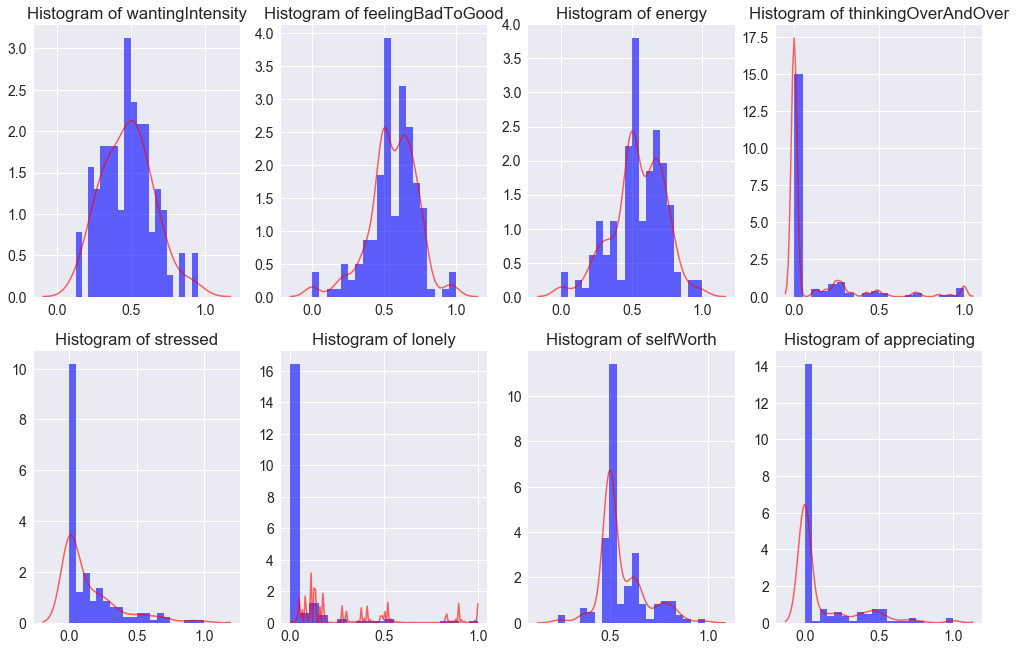

In [149]:
bins = 20
plt.figure(figsize=(17,11))

for i in range(8):
    plt.subplot(2, 4, i+1)
    sns.distplot(a=df[continuous_cols[i]].dropna(axis=0).values, bins=bins, norm_hist=True, kde=True, color='b', hist_kws={'alpha':0.6}, kde_kws={'color':'red', 'linewidth':1.5, 'alpha':0.6})
    plt.title('Histogram of {}'.format(continuous_cols[i]))

In [150]:
# ## Wanting Intensity 
# plt.figure(figsize=(8,8))
# g = sns.distplot(a=df['wantingIntensity'].dropna(axis=0), norm_hist=True, bins=20, kde=True, color='b', hist_kws={'alpha':0.6}, kde_kws={'color':'red', 'linewidth':3, 'alpha':0.7})
# g.set_title('Histogram of Wanting Intensity')
# g.set_xlim((0, 1))


** there is no input page for emotion intensity, but there exists a field for it in the data?**

In [115]:
# ## Feeling
# def find_feeling_intensity(x):
#     if x[len(x)-1] == 1:
#         return 0
#     else:
# feeling = pd.Series(name='feeling', index=np.arange(0, df.shape[0]))
# cols = df.columns.tolist()
# feeling_cols = cols[cols.index('feeling_angry'):cols.index('feelingIntensity_sad')+1] + ['feeling_noEmotion']
# df[feeling_cols].apply(find_feeling_intensity,axis=1)

### 2. Most Common for all Categorical Variables  (Bar Chart - Count)

## Time Series
---

### 1. Hourly Averages for all Continuous Variables 

In [185]:
# Extract hour from startTime_ISO8601
df['startTime_ISO8601'] = pd.to_datetime(df['startTime_ISO8601'].apply(lambda x: x[:-6]), format='%Y-%m-%dT%H:%M:%S')

df['hour'] = df['startTime_ISO8601'].dt.hour

TypeError: 'Timestamp' object has no attribute '__getitem__'

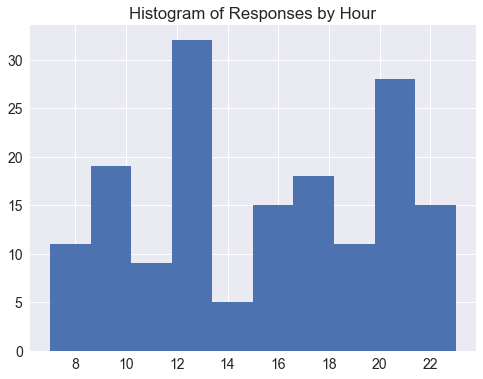

In [218]:
plt.figure(figsize=(8,6))
plt.hist(x=df['hour']);
plt.title('Histogram of Responses by Hour')

In [227]:
# fig, ax1 = plt.subplots()

# grouped = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='hour')[continuous_cols[i]].mean()
# plt.plot(grouped.index.values, grouped.values, 'b')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Average Intensity', color='b')
# ax1.tick_params('y', colors='b')

# ax2 = ax1.twinx()
# count = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='hour')[continuous_cols[i]].count()
# plt.plot(count.index.values, count.values, 'r')
# ax2.set_ylabel('Count', color='r')
# ax2.tick_params('y', colors='r')

# plt.title('{} by Hour'.format(continuous_cols[i]))

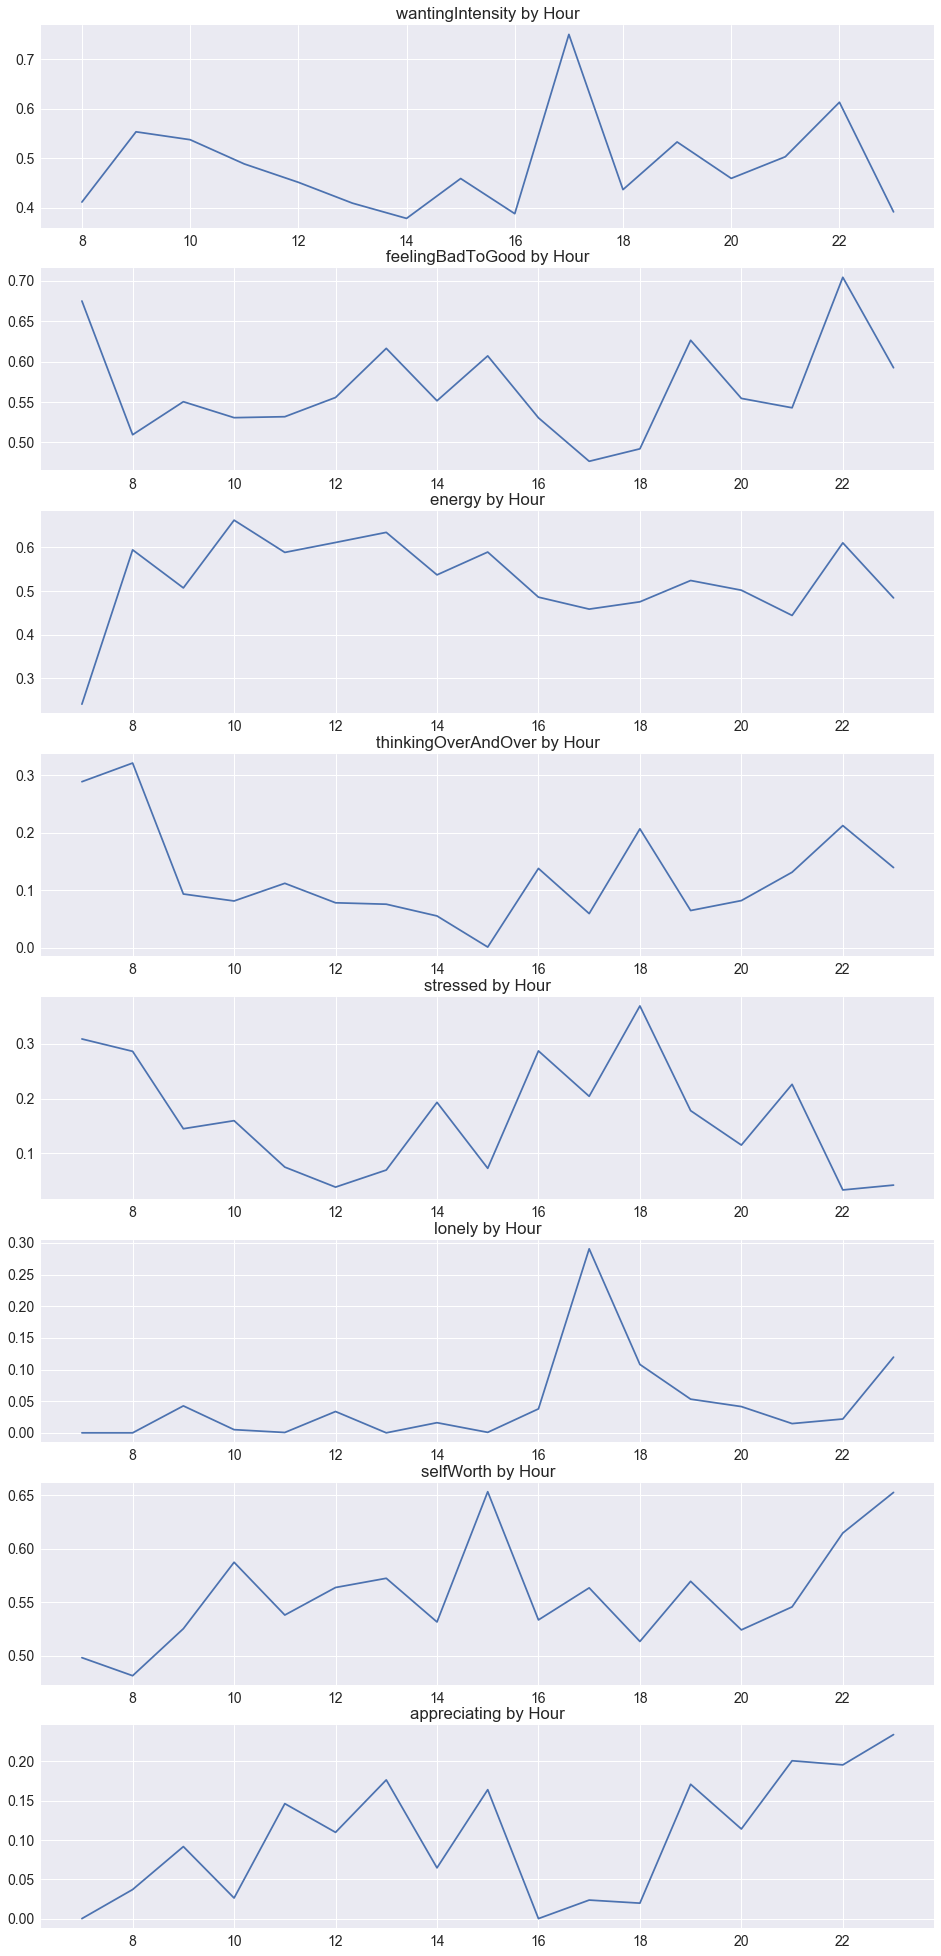

In [228]:
plt.figure(figsize=(16,35))
for i in range(len(continuous_cols)):
    
    plt.subplot(len(continuous_cols), 1, i+1)
    
    grouped = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='hour')[continuous_cols[i]].mean()
    plt.plot(grouped.index.values, grouped.values)
    
#     count = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='hour')[continuous_cols[i]].count()
#     plt.plot(count.index.values, count.values)
    
    
    plt.title('{} by Hour'.format(continuous_cols[i]))



### 2. Daily Averages for All Continuous Variables 

In [233]:
df['dayofweek'] = df['startTime_ISO8601'].dt.dayofweek

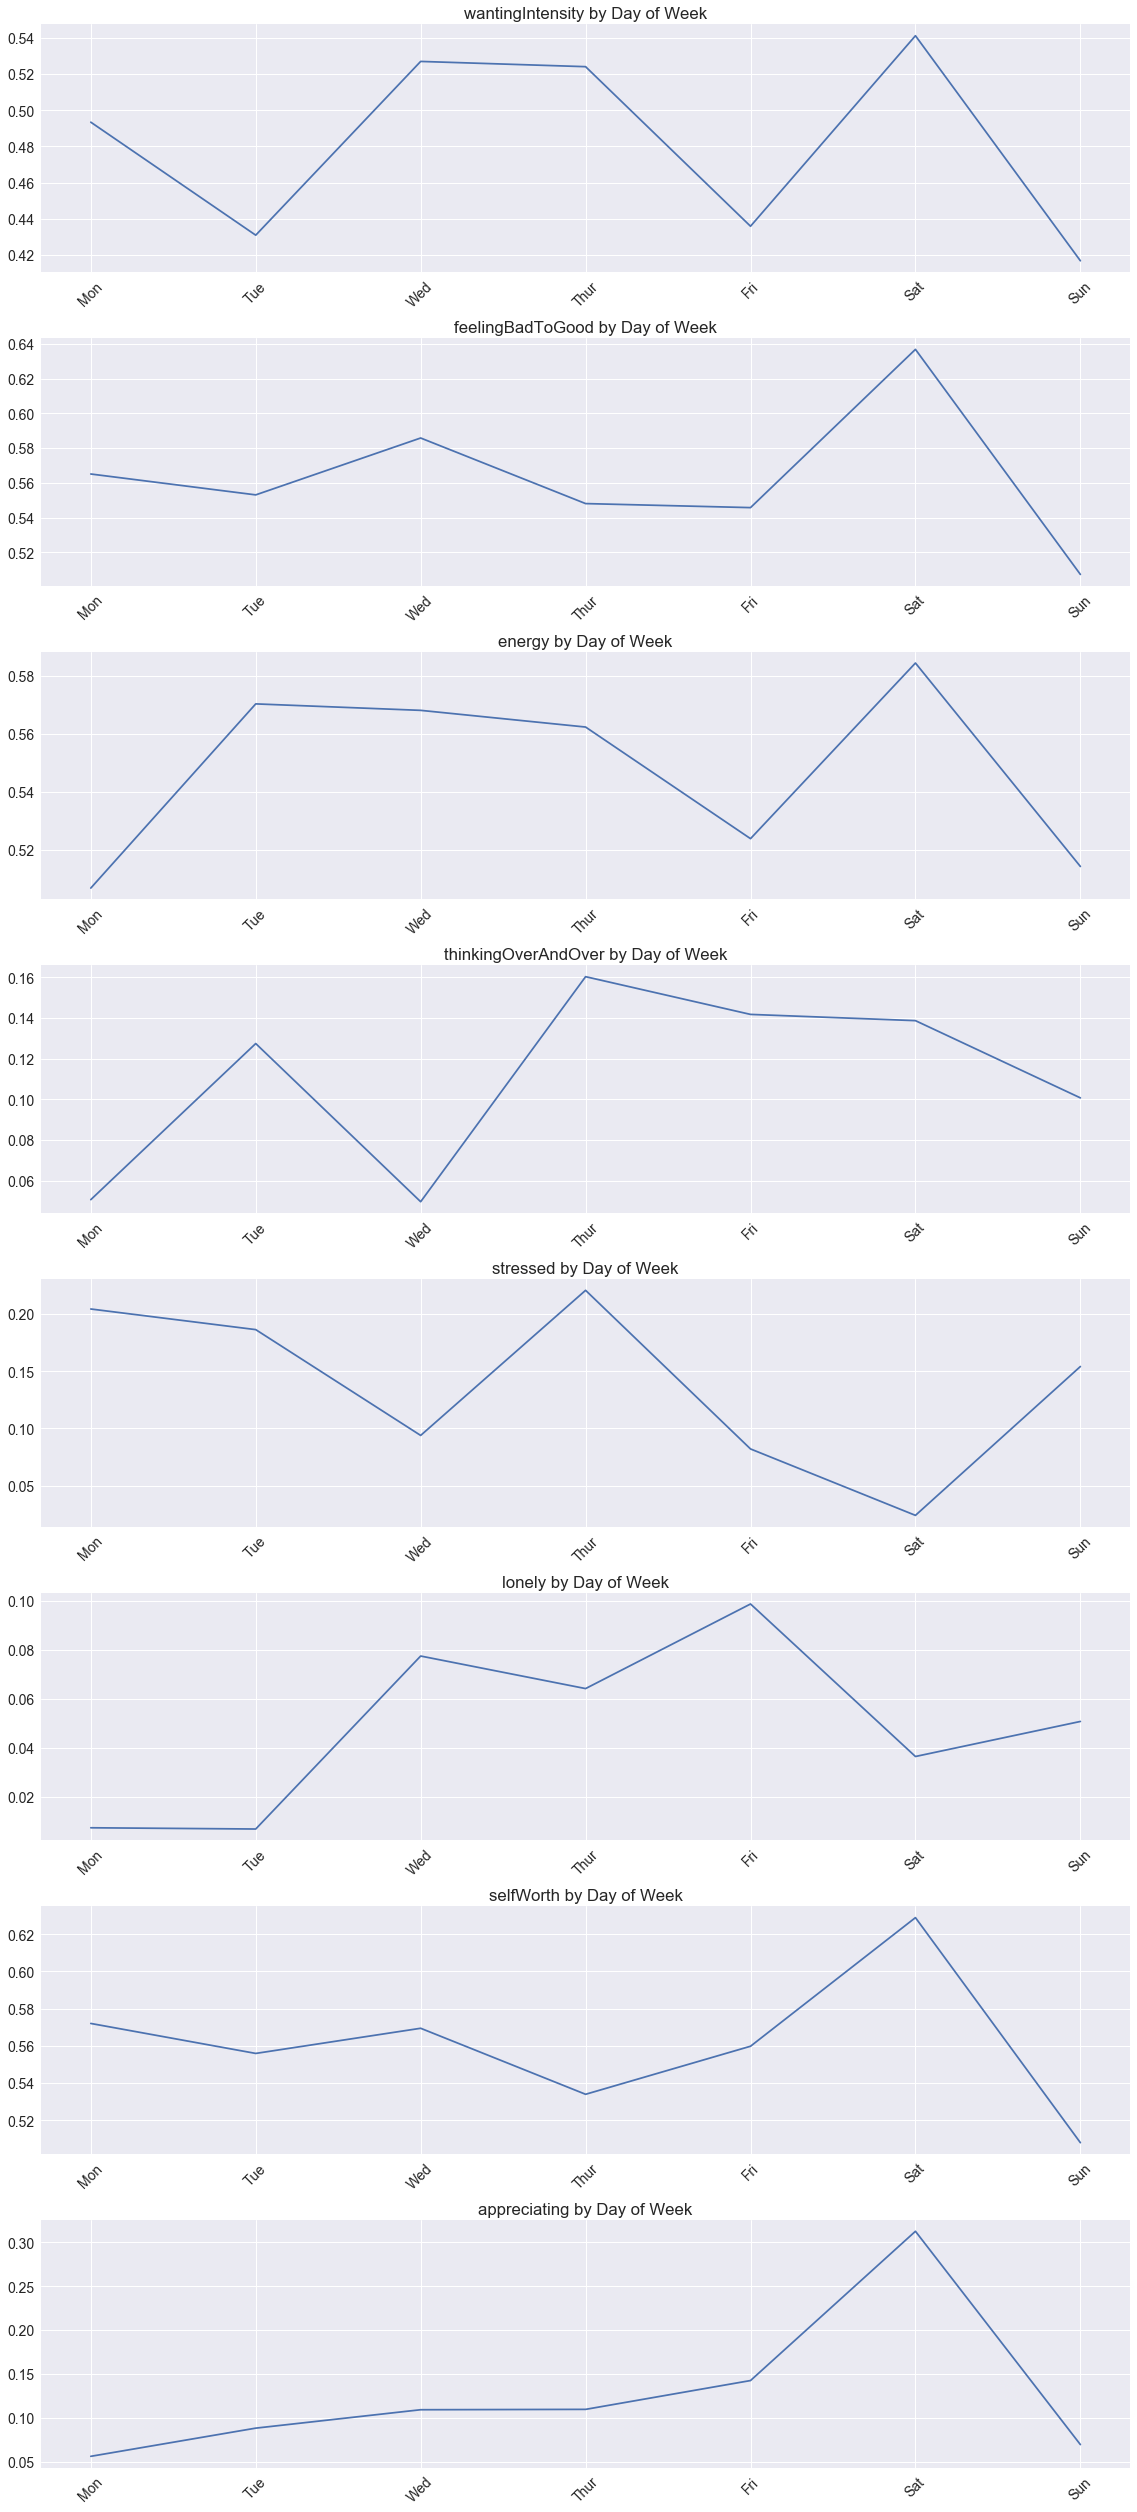

In [242]:
labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

plt.figure(figsize=(16,35))

for i in range(len(continuous_cols)):
    
    plt.subplot(len(continuous_cols), 1, i+1)
    
    grouped = df.iloc[df[continuous_cols[i]].dropna(axis=0).index].groupby(by='dayofweek')[continuous_cols[i]].mean()
    plt.plot(grouped.index.values, grouped.values)
    
    plt.xticks(grouped.index.values, labels, rotation=45)
    
    plt.title('{} by Day of Week'.format(continuous_cols[i]))
    
plt.tight_layout()